<a href="https://colab.research.google.com/github/Areeba391391/Invisible-Effort-Analyzer/blob/main/invisible_effort_analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python matplotlib numpy pandas gdown

In [2]:
import os, glob, zipfile

def extract_all_zips_autopilot(base="/content"):
    extracted_any = True
    round_no = 1
    while extracted_any:
        extracted_any = False
        zips = glob.glob(os.path.join(base, "**/*.zip"), recursive=True)
        if not zips:
            break
        print(f"🔁 Round {round_no} — Found {len(zips)} zip(s)")
        for z in zips:
            try:
                out_dir = os.path.splitext(z)[0]
                os.makedirs(out_dir, exist_ok=True)
                with zipfile.ZipFile(z, 'r') as zip_ref:
                    zip_ref.extractall(out_dir)
                print("✅ Extracted:", z)
                os.remove(z)  # avoid infinite loop
                extracted_any = True
            except Exception as e:
                print("❌ Failed:", z, e)
        round_no += 1
    print("🎉 All ZIPs extracted (including nested ones)")

extract_all_zips_autopilot("/content")

🔁 Round 1 — Found 4 zip(s)
✅ Extracted: /content/dataset1.zip
✅ Extracted: /content/dataset2.zip
✅ Extracted: /content/dataset2/2/archive (2).zip
✅ Extracted: /content/dataset1/1/archive (3).zip
🎉 All ZIPs extracted (including nested ones)


In [3]:
import os

def auto_find_image_roots(base="/content", exts=(".png", ".jpg", ".jpeg")):
    roots = []
    for root, dirs, files in os.walk(base):
        imgs = [f for f in files if f.lower().endswith(exts)]
        if imgs:
            roots.append((root, len(imgs)))
    roots = sorted(roots, key=lambda x: x[1], reverse=True)
    return roots

candidates = auto_find_image_roots("/content")

if not candidates:
    raise SystemExit("❌ Kahin bhi PNG/JPG files nahi milin. ZIP structure check karo.")

print("📂 Top folders jahan images milin:")
for path, count in candidates[:5]:
    print(f"👉 {path}  ->  {count} images")

# Auto-pick best root
data_path = candidates[0][0]
print("\n✅ Auto-selected image root:", data_path)

📂 Top folders jahan images milin:
👉 /content/dataset2/2/archive (2)/Structured/train/laughing  ->  714 images
👉 /content/dataset2/2/archive (2)/Structured/train/dancing  ->  714 images
👉 /content/dataset2/2/archive (2)/Structured/train/listening_to_music  ->  714 images
👉 /content/dataset2/2/archive (2)/Structured/train/running  ->  714 images
👉 /content/dataset2/2/archive (2)/Structured/train/sitting  ->  714 images

✅ Auto-selected image root: /content/dataset2/2/archive (2)/Structured/train/laughing


In [4]:
import os

video_sequences = []
for root, dirs, files in os.walk(data_path):
    frames = sorted([os.path.join(root, f) for f in files if f.lower().endswith((".png", ".jpg", ".jpeg"))])
    if frames:
        video_sequences.append(frames)

print("✅ Total sequences found:", len(video_sequences))
print("First sequence sample:", video_sequences[0][:5])

✅ Total sequences found: 1
First sequence sample: ['/content/dataset2/2/archive (2)/Structured/train/laughing/Image_10000.jpg', '/content/dataset2/2/archive (2)/Structured/train/laughing/Image_10001.jpg', '/content/dataset2/2/archive (2)/Structured/train/laughing/Image_10028.jpg', '/content/dataset2/2/archive (2)/Structured/train/laughing/Image_10036.jpg', '/content/dataset2/2/archive (2)/Structured/train/laughing/Image_10037.jpg']


In [7]:
import cv2, numpy as np

movement_scores = []

# Resize target (same for all images)
target_size = (224, 224)

# Only one sequence (your case)
seq = video_sequences[0]

prev_gray = None
for frame_path in seq:
    frame = cv2.imread(frame_path)
    if frame is None:
        continue

    # Resize and convert to gray
    frame_resized = cv2.resize(frame, target_size)
    gray = cv2.cvtColor(frame_resized, cv2.COLOR_BGR2GRAY)

    motion = 0.0
    if prev_gray is not None:
        flow = cv2.calcOpticalFlowFarneback(
            prev_gray, gray, None,
            pyr_scale=0.5, levels=3, winsize=15,
            iterations=3, poly_n=5, poly_sigma=1.2, flags=0
        )
        mag, _ = cv2.cartToPolar(flow[...,0], flow[...,1])
        motion = float(np.mean(mag))

    prev_gray = gray
    movement_scores.append(motion)

movement_scores = np.array(movement_scores)
print("✅ Processed frames:", len(movement_scores))

✅ Processed frames: 714


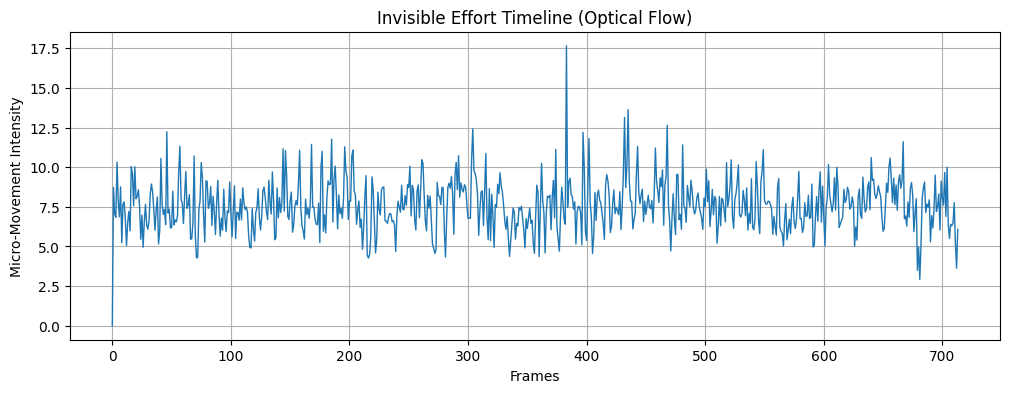

✅ CSV saved: /content/invisible_effort_timeline.csv


In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Plot
plt.figure(figsize=(12,4))
plt.plot(movement_scores, linewidth=1)
plt.title("Invisible Effort Timeline (Optical Flow)")
plt.xlabel("Frames")
plt.ylabel("Micro-Movement Intensity")
plt.grid(True)
plt.show()

# Save CSV
df = pd.DataFrame({
    "frame": list(range(len(movement_scores))),
    "micro_movement": movement_scores
})
df.to_csv("/content/invisible_effort_timeline.csv", index=False)
print("✅ CSV saved: /content/invisible_effort_timeline.csv")

In [9]:
import pandas as pd

df = pd.DataFrame({
    "frame": list(range(len(movement_scores))),
    "micro_movement": movement_scores
})
df.to_csv("/content/invisible_effort_timeline.csv", index=False)
print("✅ CSV saved: /content/invisible_effort_timeline.csv")

✅ CSV saved: /content/invisible_effort_timeline.csv
